# 自然言語処理をする

Rで実行したかったのですが，Google Colabで形態素解析MeCabを実行できる環境を維持することは初心者にはたいへんそうなので，
Pythonを使うことにします．
言語特有の問題までは踏み込まないので気にしないでください．

## Pythonで形態素解析を使う

最初に形態素解析ツールMeCab[参考：MeCabのサイト](https://taku910.github.io/mecab/)を使えるようにします．
ワードクラウドで使うためのフォントもインストールしておきます．

In [1]:
!apt-get -y install fonts-ipafont-gothic
! pip install mecab-python3 unidic-lite

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (6,973 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-g

次に最初のサンプルを実行します．

In [2]:
import MeCab
print(MeCab.Tagger().parse("失敗に挑戦しないことが最大の失敗である"))

失敗	シッパイ	シッパイ	失敗	名詞-普通名詞-サ変可能			0
に	ニ	ニ	に	助詞-格助詞			
挑戦	チョーセン	チョウセン	挑戦	名詞-普通名詞-サ変可能			0
し	シ	スル	為る	動詞-非自立可能	サ行変格	未然形-一般	0
ない	ナイ	ナイ	ない	助動詞	助動詞-ナイ	連体形-一般	
こと	コト	コト	事	名詞-普通名詞-一般			2
が	ガ	ガ	が	助詞-格助詞			
最大	サイダイ	サイダイ	最大	名詞-普通名詞-一般			0
の	ノ	ノ	の	助詞-格助詞			
失敗	シッパイ	シッパイ	失敗	名詞-普通名詞-サ変可能			0
で	デ	ダ	だ	助動詞	助動詞-ダ	連用形-一般	
ある	アル	アル	有る	動詞-非自立可能	五段-ラ行	終止形-一般	1
EOS



次の例はもとの文を分かち書きだけにするオプションをTagger内で指定しています．

In [3]:
print(MeCab.Tagger("-Owakati").parse("失敗に挑戦しないことが最大の失敗である"))

失敗 に 挑戦 し ない こと が 最大 の 失敗 で ある 



## 青空文庫からテキストファイルを取得する

ここでは青空文庫から作品ファイルを取得してみます．
例題の実行が済んだ後で，
みなさんも好みの作品のURLで置き換えて実行してみてください．

ファイル取得用のURLは，[青空文庫](https://www.aozora.gr.jp)にて，「ファイルのダウンロード」リンクをクリックの上，
表示ファイル名（拡張子htmlのもの）から「リンクをコピー」してください．
今回の例題で変更の必要なのはここおよび次のプログラム部分だけです．

In [4]:
! wget https://www.aozora.gr.jp/cards/000042/files/1108_13798.html

--2022-06-28 01:10:36--  https://www.aozora.gr.jp/cards/000042/files/1108_13798.html
Resolving www.aozora.gr.jp (www.aozora.gr.jp)... 59.106.13.115
Connecting to www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17292 (17K) [text/html]
Saving to: ‘1108_13798.html’

1108_13798.html     100%[===================>]  16.89K  --.-KB/s    in 0s      

2022-06-28 01:10:37 (317 MB/s) - ‘1108_13798.html’ saved [17292/17292]



次の命令でPythonにダウンロードしたファイルを使えるようにします．
そのために上のプログラムで取得するファイル名を変更した場合，以下でも同じファイル名に変更しておいてください．
今回の課題で書き換えを行うのはここまでです．

ダウンロードしたファイルはHTMLというウェブページ用の形式であるため，本文以外の情報を多く含みます．
そうした邪魔者となる情報を，BeautifulSoupというツールを用いて除去します．

In [5]:
import re
f = open('1108_13798.html', 'r', encoding='SJIS')
html_file = f.read()
f.close()
# 代入結果の確認
html_file
# 本文のみにする
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_file, 'lxml')

main_text = soup.find("div", class_='main_text')

#ルビが振ってあるのを削除
for yomigana in main_text.find_all(["rp","h4","rt"]):
  yomigana.decompose()

bunko_text = [line.strip() for line in main_text.text.strip().splitlines()]

print(bunko_text)

['芸術家にして科学を理解し愛好する人も無いではない。また科学者で芸術を鑑賞し享楽する者もずいぶんある。しかし芸術家の中には科学に対して無頓着であるか、あるいは場合によっては一種の反感をいだくものさえあるように見える。また多くの科学者の中には芸術に対して冷淡であるか、あるいはむしろ嫌忌の念をいだいているかのように見える人もある。場合によっては芸術を愛する事が科学者としての堕落であり、また恥辱であるように考えている人もあり、あるいは文芸という言葉からすぐに不道徳を連想する潔癖家さえまれにはあるように思われる。', '科学者の天地と芸術家の世界とはそれほど相いれぬものであろうか、これは自分の年来の疑問である。', '夏目漱石先生がかつて科学者と芸術家とは、その職業と嗜好を完全に一致させうるという点において共通なものであるという意味の講演をされた事があると記憶している。もちろん芸術家も時として衣食のために働かなければならぬと同様に、科学者もまた時として同様な目的のために自分の嗜好に反した仕事に骨を折らなければならぬ事がある。しかしそのような場合にでも、その仕事の中に自分の天与の嗜好に逢着して、いつのまにかそれが仕事であるという事を忘れ、無我の境に入りうる機会も少なくないようである。いわんや衣食に窮せず、仕事に追われぬ芸術家と科学者が、それぞれの製作と研究とに没頭している時の特殊な心的状態は、その間になんらの区別をも見いだしがたいように思われる。しかしそれだけのことならば、あるいは芸術家と科学者のみに限らぬかもしれない。天性の猟師が獲物をねらっている瞬間に経験する機微な享楽も、樵夫が大木を倒す時に味わう一種の本能満足も、これと類似の点がないとはいわれない。', 'しかし科学者と芸術家の生命とするところは創作である。他人の芸術の模倣は自分の芸術でないと同様に、他人の研究を繰り返すのみでは科学者の研究ではない。もちろん両者の取り扱う対象の内容には、それは比較にならぬほどの差別はあるが、そこにまたかなり共有な点がないでもない。科学者の研究の目的物は自然現象であってその中になんらかの未知の事実を発見し、未発の新見解を見いだそうとするのである。芸術家の使命は多様であろうが、その中には広い意味における天然の事象に対する見方とその表現の方法において、なんらかの新しいものを求めようとするの

本文以外のじゃまものを除去する（クレンジング）ほうが良いのですが，
ここでは処理を簡単に見せるため省略しています．
クレンジングのためにはBeautifulSoupなどのツールがあります．

## ワードクラウドの出力

以下の命令はワードクラウドに出力するために，すでに試した分かち書きにします．

In [6]:
bunko_text2=','.join(bunko_text)
bunko_text3 = MeCab.Tagger("-Owakati").parse(bunko_text2)
print(bunko_text3)

芸術 家 に し て 科学 を 理解 し 愛好 する 人 も 無い で は ない 。 また 科学 者 で 芸術 を 鑑賞 し 享楽 する 者 も ずいぶん ある 。 しかし 芸術 家 の 中 に は 科学 に 対し て 無 頓着 で ある か 、 あるいは 場合 に よっ て は 一種 の 反感 を いだく もの さえ ある よう に 見える 。 また 多く の 科学 者 の 中 に は 芸術 に 対し て 冷淡 で ある か 、 あるいは むしろ 嫌忌 の 念 を いだい て いる か の よう に 見える 人 も ある 。 場合 に よっ て は 芸術 を 愛する 事 が 科学 者 と し て の 堕落 で あり 、 また 恥辱 で ある よう に 考え て いる 人 も あり 、 あるいは 文芸 と いう 言葉 から すぐ に 不 道徳 を 連想 する 潔癖 家 さえ まれ に は ある よう に 思わ れる 。, 科学 者 の 天地 と 芸術 家 の 世界 と は それ ほど 相 いれ ぬ もの で あろう か 、 これ は 自分 の 年来 の 疑問 で ある 。, 夏目 漱石 先生 が かつて 科学 者 と 芸術 家 と は 、 その 職業 と 嗜好 を 完全 に 一致 さ せ うる と いう 点 に おい て 共通 な もの で ある と いう 意味 の 講演 を さ れ た 事 が ある と 記憶 し て いる 。 もちろん 芸術 家 も 時 と し て 衣 食 の ため に 働か なけれ ば なら ぬ と 同様 に 、 科学 者 も また 時 と し て 同様 な 目的 の ため に 自分 の 嗜好 に 反し た 仕事 に 骨 を 折ら なけれ ば なら ぬ 事 が ある 。 しかし その よう な 場合 に で も 、 その 仕事 の 中 に 自分 の 天与 の 嗜好 に 逢着 し て 、 いつ の ま に か それ が 仕事 で ある と いう 事 を 忘れ 、 無我 の 境 に 入り うる 機会 も 少なく ない よう で ある 。 いわんや 衣 食 に 窮せ ず 、 仕事 に 追わ れ ぬ 芸術 家 と 科学 者 が 、 それぞれ の 製作 と 研究 と に 没頭 し て いる 時 の 特殊 な 心的 状態 は 、 その 間 に なん ら の

以下ではワードクラウドを出力するためのライブラリをインストールし，
上で準備した文章を与えて出力しています．

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


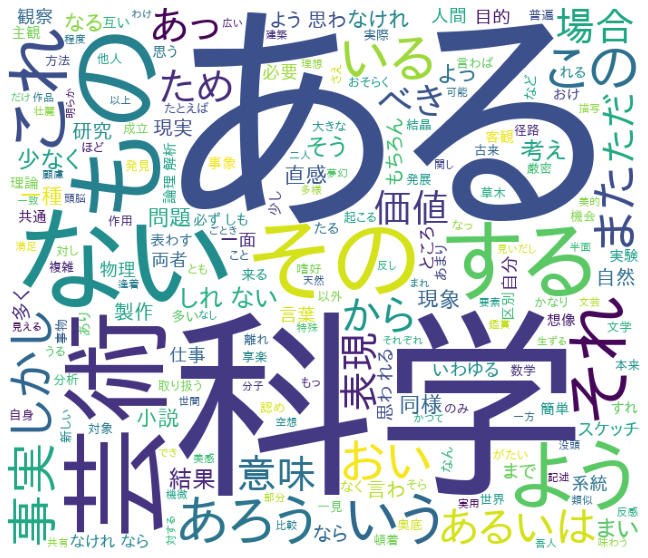

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [11]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 文字表示用フォント指定
f_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf' #日本語フォントの取得
wordcloud = WordCloud(background_color="white", font_path=f_path, width=700, height=600)
wordcloud.generate(bunko_text3)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off") #メモリの非表示
# plt.show()
# 以下のファイル名で保存されます．提出用はダウンロードして利用してください．
plt.savefig("word_cloud.png")
from google.colab import files
files.download("word_cloud.png")